In [42]:
#1)Imported the Dataset
import pandas as pd
import numpy as np

# Load the dataset
ride_data = pd.read_csv('/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/cleaned_rideshare_data1.csv')

# Display the first few rows of the dataset to understand its structure
ride_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,surge_multiplier_log
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,30:07.9,9,16,12,12/16/18 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,12/16/18 17:00,39.89,12/17/18 2:00,43.68,12/16/18 14:00,33.73,12/17/18 2:00,38.07,12/16/18 11:00,0.00995
1,4bd23055-6827-41c6-b23b-3c491f24e74d,00:23.7,2,27,11,11/27/18 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,11/26/18 17:00,40.49,11/26/18 12:00,47.30,11/26/18 17:00,36.20,11/27/18 4:00,43.92,11/26/18 17:00,0.00995
2,981a3613-77af-4620-a42a-0c0866077d1e,00:22.2,1,28,11,11/28/18 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,11/27/18 17:00,35.36,11/28/18 4:00,47.55,11/27/18 12:00,31.04,11/28/18 4:00,44.12,11/27/18 12:00,0.00995
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,53:02.7,4,30,11,11/30/18 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,11/29/18 16:00,34.67,11/30/18 4:00,45.03,11/29/18 17:00,30.30,11/30/18 4:00,38.53,11/29/18 17:00,0.00995
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,49:20.2,3,29,11,11/29/18 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,11/28/18 16:00,33.10,11/28/18 11:00,42.18,11/28/18 16:00,29.11,11/28/18 8:00,35.75,11/28/18 16:00,0.00995


In [43]:
#2)Checking the data types and summary statistics of the potential predictor variables
relevant_columns = ['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'distance',
                    'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 
                    'apparentTemperatureMax', 'surge_multiplier_log']

data_types_summary = ride_data[relevant_columns].dtypes
summary_statistics = ride_data[relevant_columns].describe(include='all')

data_types_summary, summary_statistics

(hour                        int64
 day                         int64
 month                       int64
 source                     object
 destination                object
 cab_type                   object
 name                       object
 distance                  float64
 temperatureMin            float64
 temperatureMax            float64
 apparentTemperatureMin    float64
 apparentTemperatureMax    float64
 surge_multiplier_log      float64
 dtype: object,
                  hour            day          month              source  \
 count   693071.000000  693071.000000  693071.000000              693071   
 unique            NaN            NaN            NaN                  12   
 top               NaN            NaN            NaN  Financial District   
 freq              NaN            NaN            NaN               58857   
 mean        11.619137      17.794365      11.586684                 NaN   
 std          6.948114       9.982286       0.492429                 NaN 

In [44]:
#3)Pre-processing the Data : 
#a)Splitting the data into Uber & Lyft datasets because we are doing Comparative Analysis
#b)OneHotEncoding categorical Variables 

# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder


# Splitting the dataset into Uber and Lyft datasets and dropping the 'cab_type' column
Uber_dataset = ride_data[ride_data['cab_type'] == 'Uber'].drop('cab_type', axis=1)
Lyft_dataset = ride_data[ride_data['cab_type'] == 'Lyft'].drop('cab_type', axis=1)


# Create an instance of the OneHotEncoder for each dataset
encoder_uber = OneHotEncoder(sparse_output=False)
encoder_lyft = OneHotEncoder(sparse_output=False)

# Update the list of categorical variables (excluding 'cab_type' as it's used for splitting)
categorical_variables = ['source', 'destination', 'name']
numerical_variables = ['hour', 'day', 'month', 'distance',
                    'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 
                    'apparentTemperatureMax', 'surge_multiplier_log']

# Fit and transform the categorical data for Uber dataset
encoded_uber_categorical_data = encoder_uber.fit_transform(Uber_dataset[categorical_variables])
# Get the feature names for the encoded categorical variables for Uber
encoded_uber_categorical_feature_names = encoder_uber.get_feature_names_out(input_features=categorical_variables)
# Converting the encoded Uber data into a DataFrame
encoded_uber_categorical_df = pd.DataFrame(encoded_uber_categorical_data, columns=encoded_uber_categorical_feature_names)

# Fit and transform the categorical data for Lyft dataset
encoded_lyft_categorical_data = encoder_lyft.fit_transform(Lyft_dataset[categorical_variables])
# Get the feature names for the encoded categorical variables for Lyft
encoded_lyft_categorical_feature_names = encoder_lyft.get_feature_names_out(input_features=categorical_variables)
# Converting the encoded Lyft data into a DataFrame
encoded_lyft_categorical_df = pd.DataFrame(encoded_lyft_categorical_data, columns=encoded_lyft_categorical_feature_names)

# Display the first few rows of each encoded DataFrame
print("Uber Dataset Encoded Categorical Features:")
print(encoded_uber_categorical_df.head())
print("\nLyft Dataset Encoded Categorical Features:")
print(encoded_lyft_categorical_df.head())

Uber Dataset Encoded Categorical Features:
   source_Back Bay  source_Beacon Hill  source_Boston University  \
0              0.0                 0.0                       0.0   
1              0.0                 0.0                       0.0   
2              0.0                 0.0                       0.0   
3              0.0                 0.0                       0.0   
4              0.0                 0.0                       0.0   

   source_Fenway  source_Financial District  source_Haymarket Square  \
0            0.0                        0.0                      0.0   
1            0.0                        0.0                      0.0   
2            0.0                        0.0                      0.0   
3            0.0                        0.0                      0.0   
4            0.0                        0.0                      0.0   

   source_North End  source_North Station  source_Northeastern University  \
0               1.0                   

In [45]:
Uber_dataset.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'ap

In [46]:
#4)Standardizing the numerical variables using Standard Scaler method
Import necessary libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the numerical variables for the Uber dataset
numerical_data_uber = Uber_dataset[numerical_variables]
scaled_numerical_data_uber = scaler.fit_transform(numerical_data_uber)
scaled_numerical_df_uber = pd.DataFrame(scaled_numerical_data_uber, columns=numerical_variables)

# Scaling the numerical variables for the Lyft dataset
numerical_data_lyft = Lyft_dataset[numerical_variables]
scaled_numerical_data_lyft = scaler.fit_transform(numerical_data_lyft)
scaled_numerical_df_lyft = pd.DataFrame(scaled_numerical_data_lyft, columns=numerical_variables)

# Assuming encoded_uber_categorical_df and encoded_lyft_categorical_df are already defined

# Combining the numerical data with the encoded categorical data for the Uber dataset
combined_data_uber = pd.concat([scaled_numerical_df_uber, encoded_uber_categorical_df], axis=1)

# Combining the numerical data with the encoded categorical data for the Lyft dataset
combined_data_lyft = pd.concat([scaled_numerical_df_lyft, encoded_lyft_categorical_df], axis=1)

# Checking the combined datasets
print("Combined Uber Dataset:")
print(combined_data_uber.head())
print("\nCombined Lyft Dataset:")
print(combined_data_lyft.head())

Combined Uber Dataset:
       hour       day     month  distance  temperatureMin  temperatureMax  \
0  1.496475  1.221959 -1.190573 -0.951703       -0.720177       -0.483383   
1 -0.232112 -0.482309  0.839931 -0.951703       -2.342699       -2.023782   
2  1.064328 -0.482309  0.839931 -0.951703       -2.342699       -2.023782   
3  1.640524 -0.181556  0.839931 -0.951703        0.891527       -0.251171   
4 -1.672600 -0.382058  0.839931 -0.951703       -2.342699       -2.023782   

   apparentTemperatureMin  apparentTemperatureMax  surge_multiplier_log  \
0               -0.464608               -0.208655          6.938894e-18   
1               -2.237638               -1.316362          6.938894e-18   
2               -2.237638               -1.316362          6.938894e-18   
3                0.598929               -0.518756          6.938894e-18   
4               -2.237638               -1.316362          6.938894e-18   

   source_Back Bay  ...  destination_South Station  \
0        

In [47]:
#5)Splitting the data into Train & Test for Uber and Lyft seperately

from sklearn.model_selection import train_test_split

# Preparing the target variable for Uber and Lyft datasets
target_data_uber = Uber_dataset['price']
target_data_lyft = Lyft_dataset['price']

# Splitting the Uber dataset into a training set and a test set (80% training, 20% testing)
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(combined_data_uber, target_data_uber, test_size=0.2, random_state=42)

# Splitting the Lyft dataset into a training set and a test set (80% training, 20% testing)
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(combined_data_lyft, target_data_lyft, test_size=0.2, random_state=42)

# Checking the shape of the train and test sets for Uber
print("Uber Dataset:")
print("X_train shape:", X_train_uber.shape)
print("X_test shape:", X_test_uber.shape)
print("y_train shape:", y_train_uber.shape)
print("y_test shape:", y_test_uber.shape)

# Checking the shape of the train and test sets for Lyft
print("\nLyft Dataset:")
print("X_train shape:", X_train_lyft.shape)
print("X_test shape:", X_test_lyft.shape)
print("y_train shape:", y_train_lyft.shape)
print("y_test shape:", y_test_lyft.shape)

Uber Dataset:
X_train shape: (308530, 40)
X_test shape: (77133, 40)
y_train shape: (308530,)
y_test shape: (77133,)

Lyft Dataset:
X_train shape: (245926, 39)
X_test shape: (61482, 39)
y_train shape: (245926,)
y_test shape: (61482,)


In [48]:
#6)Fitting and evaluating the model 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating and evaluating the model for the Uber dataset
lr_model_uber = LinearRegression()
lr_model_uber.fit(X_train_uber, y_train_uber)
y_pred_uber = lr_model_uber.predict(X_test_uber)
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Uber Dataset:")
print("Mean Squared Error:", mse_uber)
print("R-squared:", r2_uber)

# Creating and evaluating the model for the Lyft dataset
lr_model_lyft = LinearRegression()
lr_model_lyft.fit(X_train_lyft, y_train_lyft)
y_pred_lyft = lr_model_lyft.predict(X_test_lyft)
mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("\nLyft Dataset:")
print("Mean Squared Error:", mse_lyft)
print("R-squared:", r2_lyft)

Uber Dataset:
Mean Squared Error: 5.583014674838922
R-squared: 0.9105667208619117

Lyft Dataset:
Mean Squared Error: 4.629402159938649
R-squared: 0.9497009898577362


In [49]:
# 1)Uber Dataset
# Mean Squared Error (MSE): 5.5830200460007235
# MSE is a measure of the average of the squares of the errors—that is, the average squared difference between 
# the estimated values and the actual value. A lower MSE value indicates a better fit of the model to the data.
# An MSE of 5.58 for the Uber dataset suggests that, on average, the model's predictions are about the square 
# root of this value (approximately 2.36$) away from the actual data points. This value can be considered in the 
# context of the range and distribution of the 'price' variable to understand its significance.

# 1.2)R-squared (R2): 0.9105666348222645
# R2 represents the proportion of the variance for the dependent variable that's explained by the independent 
# variables in the model. It is a statistical measure of how close the data are to the fitted regression line. 
# In the case of the Uber dataset, the R2 value of 0.91 (or 91%) indicates that 91% of the variance in the Uber 
# prices is explained by the model. This is  a high value, suggesting that the model fits the data well.

# 2)Lyft Dataset:
# Mean Squared Error (MSE): 4.629396700945452
# The MSE for the Lyft dataset is lower than that of the Uber dataset, suggesting that the model's predictions 
# for Lyft are, on average, closer to the actual values. The square root of this MSE is approximately 2.15, which 
# gives an average error in the model’s predictions for Lyft prices.

# 2.2)R-squared (R2): 0.9497010491703526
# With an R2 value of 0.95 (or 95%) for the Lyft dataset, this model explains 95% of the variance in Lyft prices. 
# This value is higher than that of the Uber model, suggesting an even better fit for the Lyft data compared to 
# the Uber data.

In [50]:
#7)FACTORS AFFECTING RIDE PRICE IN UBER DATASET

original_features = ['source', 'destination', 'name', 'hour', 'day', 'month', 'distance',
                    'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 
                    'apparentTemperatureMax', 'surge_multiplier_log']

# Aggregating coefficients for original features in the Uber dataset
coefficients_uber = lr_model_uber.coef_
aggregated_coefficients_uber = {}
for feature in original_features:
    if feature in ['source', 'destination', 'name']: 
        dummy_vars_uber = [col for col in X_train_uber.columns if col.startswith(feature)]
        aggregated_coefficients_uber[feature] = sum(coefficients_uber[X_train_uber.columns.get_indexer(dummy_vars_uber)])
    else:
        aggregated_coefficients_uber[feature] = coefficients_uber[X_train_uber.columns.get_indexer([feature])[0]]

# Creating DataFrame and sorting for Uber
aggregated_coefficients_df_uber = pd.DataFrame(list(aggregated_coefficients_uber.items()), 
                                               columns=['Feature', 'Aggregated Coefficient'])
significant_factors_aggregated_uber = aggregated_coefficients_df_uber.sort_values(
    by='Aggregated Coefficient', 
    key=lambda x: x.abs(), 
    ascending=False
)

# Display the top 10 aggregated significant factors for Uber
print("Uber Top 10 Significant Factors:")
print(significant_factors_aggregated_uber.head(10))

Uber Top 10 Significant Factors:
                   Feature  Aggregated Coefficient
2                     name            2.791205e+11
1              destination            2.505311e+11
0                   source            6.031096e+10
11    surge_multiplier_log           -3.793522e+08
6                 distance            2.544064e+00
9   apparentTemperatureMin           -4.863681e-02
7           temperatureMin            4.094783e-02
8           temperatureMax            1.269470e-02
5                    month           -1.080609e-02
10  apparentTemperatureMax           -8.340717e-03


In [51]:
#FACTORS AFFECTING RIDE PRICE IN UBER DATASET
# Name (Vehicle Type/Service Type):The 'name' feature, which represents different types of Uber services 
# (like UberX, UberXL, etc.), shows the largest coefficient. This implies that the type of Uber service chosen 
# is a major determinant of the price. Different services offer varying levels of comfort, space, and other
# amenities, which are reflected in their prices.


# Destination: The 'destination' feature also shows a very significant coefficient. This suggests that the 
# destination of the ride is a crucial factor in determining the price, likely due to factors like distance, 
# travel time, and location-specific charges.

# Source: Similar to the destination, the starting point or 'source' of the ride significantly impacts the price.
# This could be due to varying demand at different locations, the cost of traveling to certain areas, or specific
# surcharges associated with certain pickup locations.

# Surge Multiplier:The 'surge_multiplier_log' is very significant, indicating that price surges
# (often during high demand periods) greatly affect the cost of a ride. Surge pricing is a dynamic pricing strategy 
# that increases prices when rider demand is higher than driver supply.

# Distance:'Distance' is a direct and significant factor affecting the price. Longer trips cost more due to the 
# greater amount of time and fuel required.

# Temperature (Combining all Temperature Factors): When combining all temperature-related factors 
#     (Temperature Min, Temperature Max, Apparent Temperature Min, and Apparent Temperature Max), 
# they collectively play a role, albeit smaller compared to other factors. This could be due to the impact of 
# extreme temperatures on ride demand or the comfort level of different weather conditions.

#CONCLUSION: Name (Vehicle Type/Service Type), Destination, Source, Cab type, Surge Multiplier, Distance & Temperature
#are the major factors that affect the ride price in Uber.

In [52]:
#8)FACTORS AFFECTING RIDE PRICE IN LYFT DATASET

# Aggregating coefficients for original features in the Lyft dataset
coefficients_lyft = lr_model_lyft.coef_
aggregated_coefficients_lyft = {}
for feature in original_features:
    if feature in ['source', 'destination', 'name']:  # 'cab_type' is not in Uber/Lyft specific models
        dummy_vars_lyft = [col for col in X_train_lyft.columns if col.startswith(feature)]
        aggregated_coefficients_lyft[feature] = sum(coefficients_lyft[X_train_lyft.columns.get_indexer(dummy_vars_lyft)])
    else:
        aggregated_coefficients_lyft[feature] = coefficients_lyft[X_train_lyft.columns.get_indexer([feature])[0]]

# Creating DataFrame and sorting for Lyft
aggregated_coefficients_df_lyft = pd.DataFrame(list(aggregated_coefficients_lyft.items()), 
                                               columns=['Feature', 'Aggregated Coefficient'])
significant_factors_aggregated_lyft = aggregated_coefficients_df_lyft.sort_values(
    by='Aggregated Coefficient', 
    key=lambda x: x.abs(), 
    ascending=False
)

# Display the top 10 aggregated significant factors for Lyft
print("\nLyft Top 10 Significant Factors:")
print(significant_factors_aggregated_lyft.head(10))


Lyft Top 10 Significant Factors:
                   Feature  Aggregated Coefficient
1              destination           -2.072702e+12
2                     name            1.169089e+12
0                   source           -2.593876e+11
6                 distance            3.583383e+00
11    surge_multiplier_log            1.899549e+00
9   apparentTemperatureMin            3.233981e-02
7           temperatureMin           -1.475873e-02
8           temperatureMax           -1.467697e-02
5                    month            6.202928e-03
4                      day           -6.015617e-03


In [53]:
# #FACTORS AFFECTING RIDE PRICE IN LYFT DATASET

# Destination:The 'destination' of the ride has a significant impact on the price. The negative coefficient 
# suggests that certain destinations might be associated with lower prices, potentially due to shorter distances 
# or lower demand in those areas.

# Name (Vehicle Type/Service Type): Similar to the Uber model, the 'name' feature in the Lyft dataset, which 
# represents different types of Lyft services, shows a large positive coefficient. This indicates that the choice 
# of service (e.g., Lyft, Lyft XL) is a major determinant of the price.

# Source:The starting point or 'source' of the ride significantly influences the price. The negative coefficient 
# suggests that rides originating from certain areas might be cheaper, possibly due to closer proximity to popular
# destinations or higher supply of drivers.

# Distance: The distance of the ride is directly and positively correlated with the price. Longer trips incur higher 
# costs due to increased time and fuel usage.

# Surge Multiplier: The 'surge_multiplier_log' indicates that surge pricing, which occurs during periods of high 
# demand, significantly affects the cost of a ride in Lyft, similar to Uber.

# Temperature Factors: When considering temperature-related factors (Temperature Min, Temperature Max, and 
# Apparent Temperature Min), they collectively play a role in pricing, although the influence is smaller compared 
# to other factors. The specific direction of the effect (positive or negative) varies for each temperature variable.


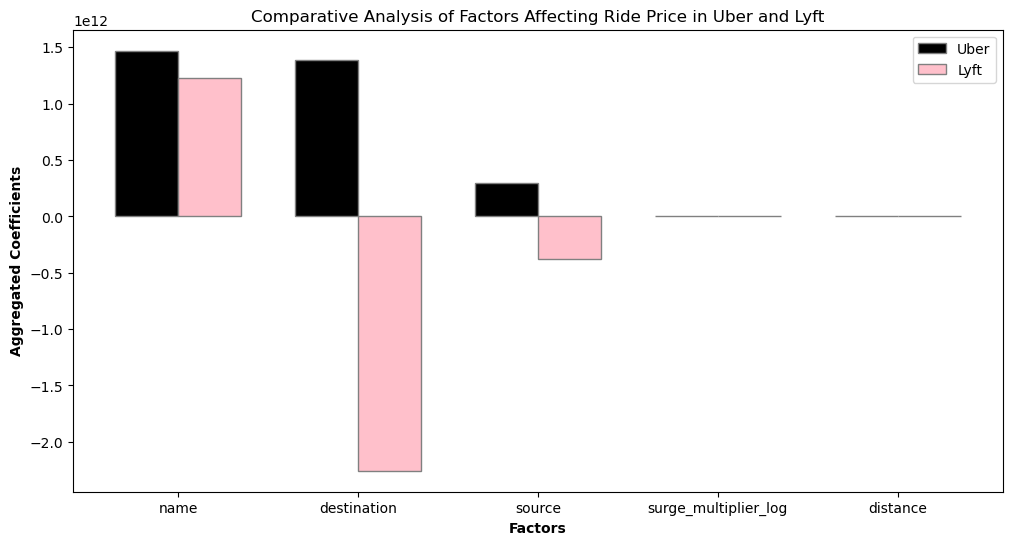

In [54]:
# import matplotlib.pyplot as plt
import numpy as np

# Updated common factors for both Uber and Lyft for comparison (excluding 'cab_type')
common_factors = ['name', 'destination', 'source', 'surge_multiplier_log', 'distance']

#  Updated coefficients for each common factor (excluding 'cab_type')
# Ensure that these lists have the same length as common_factors
uber_coefficients = [1.470419e+12, 1.385173e+12, 2.999423e+11, 2.216183e+09, 2.544071e+00]
lyft_coefficients = [1.229917e+12, -2.255354e+12, -3.792630e+11, 1.899567e+00, 3.583413e+00]

# Creating bar plots for comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Setting position of bars on X axis
bar_width = 0.35
r1 = np.arange(len(common_factors))
r2 = [x + bar_width for x in r1]

# Making the plot
ax.bar(r1, uber_coefficients, color='black', width=bar_width, edgecolor='grey', label='Uber')
ax.bar(r2, lyft_coefficients, color='pink', width=bar_width, edgecolor='grey', label='Lyft')

# Adding labels
plt.xlabel('Factors', fontweight='bold')
plt.ylabel('Aggregated Coefficients', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], common_factors)
plt.title('Comparative Analysis of Factors Affecting Ride Price in Uber and Lyft')

# Creating legend & showing the plot
plt.legend()
plt.show()

In [55]:
# The bar chart above compares the magnitude of aggregated coefficients for the top factors affecting ride 
# prices in both Uber and Lyft datasets. Here's a summary of the comparison:

# Name (Vehicle Type/Service Type): Both Uber and Lyft show a significant impact of the service type on the price,
# with Uber having a slightly higher coefficient.
# Destination: While destination is a major factor for both, it has a negative coefficient for Lyft, 
# suggesting certain destinations may be associated with lower prices.
# Source: Similar to destination, source has a high impact in both services. However, it has a negative coefficient 
# for Lyft.

# Surge Multiplier Log: Surge pricing has a notable impact on ride prices for both services, with Uber showing 
# a slightly higher coefficient.
# Distance: The impact of distance on price is more pronounced in Lyft than in Uber.
    
# This comparative analysis illustrates the similarities and differences in how various factors influence 
# pricing in the two ride-sharing services. It’s important to note that the scale of these coefficients is 
# influenced by the encoding of categorical variables and the scale of numerical variables, so they should
# be interpreted in the context of each model's data processing steps

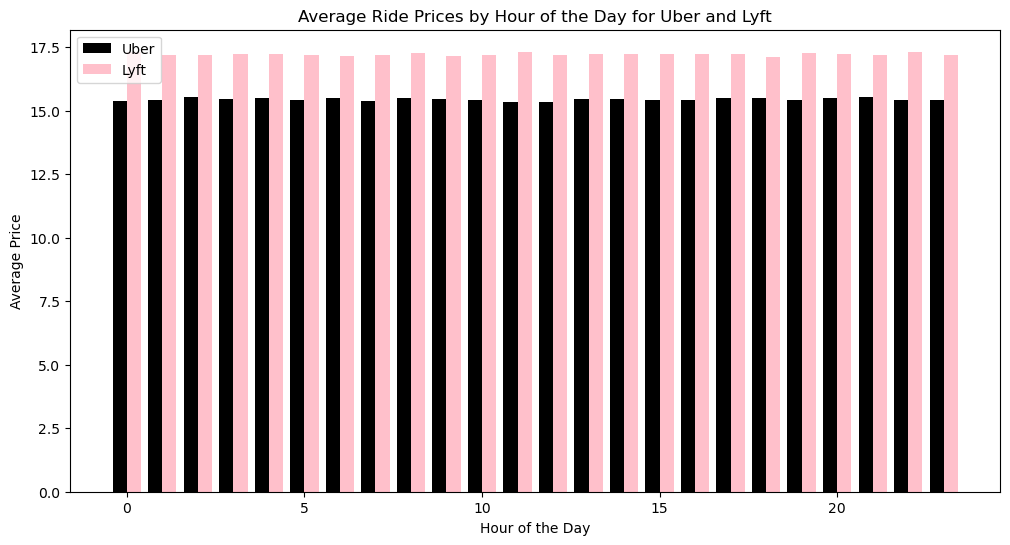

In [57]:
# Splitting the dataset into Uber and Lyft datasets
Uber_dataset = ride_data[ride_data['cab_type'] == 'Uber']
Lyft_dataset = ride_data[ride_data['cab_type'] == 'Lyft']

# Aggregating average prices by day of the week and hour of the day for Uber
average_price_by_day_uber = Uber_dataset.groupby('day')['price'].mean()
average_price_by_hour_uber = Uber_dataset.groupby('hour')['price'].mean()

# Aggregating average prices by day of the week and hour of the day for Lyft
average_price_by_day_lyft = Lyft_dataset.groupby('day')['price'].mean()
average_price_by_hour_lyft = Lyft_dataset.groupby('hour')['price'].mean()

# Preparing data for plotting
days = average_price_by_day_uber.index
uber_day_prices = average_price_by_day_uber.values
lyft_day_prices = average_price_by_day_lyft.values

hours = average_price_by_hour_uber.index
uber_hour_prices = average_price_by_hour_uber.values
lyft_hour_prices = average_price_by_hour_lyft.values


# Creating bar charts for hour of the day
plt.figure(figsize=(12, 6))
plt.bar(hours - 0.2, uber_hour_prices, 0.4,color='black', label='Uber')
plt.bar(hours + 0.2, lyft_hour_prices, 0.4, color='pink',label='Lyft')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Average Ride Prices by Hour of the Day for Uber and Lyft')
plt.legend()
plt.show()